<a href="https://colab.research.google.com/github/protzetter/BankingRecommendations/blob/master/BankingProductRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install creme

In [0]:
# define one hot encoders for categorical values
from creme import preprocessing
one_hot_Age = creme.preprocessing.OneHotEncoder('Age' , sparse=True)
one_hot_Age_Group = creme.preprocessing.OneHotEncoder('Age Group' , sparse=True)
one_hot_Country = creme.preprocessing.OneHotEncoder('Country' , sparse=True)
one_hot_Employer_Category = creme.preprocessing.OneHotEncoder('Employer Category' , sparse=True)
one_hot_Employment_Level = creme.preprocessing.OneHotEncoder('Employment Level' , sparse=True)
one_hot_Income = creme.preprocessing.OneHotEncoder('Income' , sparse=True)
one_hot_Marital_Status = creme.preprocessing.OneHotEncoder('Marital status' , sparse=True)
one_hot_National = creme.preprocessing.OneHotEncoder('National' , sparse=True)
one_hot_Parenthood = creme.preprocessing.OneHotEncoder('Parenthood' , sparse=True)
one_hot_Residence = creme.preprocessing.OneHotEncoder('Residence' , sparse=True)
one_hot_Gender = creme.preprocessing.OneHotEncoder('Gender' , sparse=True)
one_hot_product = creme.preprocessing.OneHotEncoder('Product', sparse = True)


In [0]:
# define a function to encode the input categoroical values as Python classifiers do not work with categorical input
def HotEncodeInput(x):
  out={}
  out.update(one_hot_Country.fit_one(x).transform_one(x))
  out.update(one_hot_Age.fit_one(x).transform_one(x))
  out.update(one_hot_Age_Group.fit_one(x).transform_one(x))
  out.update(one_hot_Employer_Category.fit_one(x).transform_one(x))
  out.update(one_hot_Employment_Level.fit_one(x).transform_one(x))
  out.update(one_hot_Income.fit_one(x).transform_one(x))
  out.update(one_hot_Marital_Status.fit_one(x).transform_one(x))
  out.update(one_hot_National.fit_one(x).transform_one(x))
  out.update(one_hot_Parenthood.fit_one(x).transform_one(x))
  out.update(one_hot_Residence.fit_one(x).transform_one(x))
  return out

In [0]:
# define the model pipeline, this is quite useful
# in this case we have 2 steps, 1. hot encode the input, then apply a one vs all classifier for each class
from creme import compose
from creme import multiclass, linear_model
model = compose.Pipeline([
    ('Hot Encode', compose.FuncTransformer(HotEncodeInput)),
    ('Classifier', multiclass.OneVsRestClassifier(binary_classifier=linear_model.LogisticRegression()))
])

In [0]:
from creme import metrics
from creme import model_selection
from creme import stream
accuracy=metrics.Accuracy()
params = dict(
    target_name='Product',
    )
model_selection.online_score(stream.iter_csv('/content/drive/My Drive/Colab Notebooks/productrecommendations.csv', **params), model, accuracy)

Accuracy: 0.094877

In [0]:
# define the model pipeline, this is quite useful
# in this case we have 2 steps, 1. hot encode the input, then apply a one vs all classifier for each class
from creme import compose
from creme import tree
model = compose.Pipeline([
    ('Hot Encode', compose.FuncTransformer(HotEncodeInput)),
    ('Classifier', tree.RandomForestClassifier())
])

In [0]:
from creme import metrics
from creme import model_selection
from creme import stream
accuracy=metrics.Accuracy()
params = dict(
    target_name='Product',
    )
model_selection.online_score(stream.iter_csv('/content/drive/My Drive/Colab Notebooks/productrecommendations.csv', **params), model, accuracy)

RuntimeError: ignored

In [0]:
from creme import stream
from creme import metrics

metric=metrics.Accuracy()
#accuracy=metrics.Accuracy()

for xi, yi in stream.iter_csv('/content/drive/My Drive/Colab Notebooks/productrecommendations.csv', target_name='Product'):
    y_pred=model.predict_one(xi)
    print(yi, y_pred)
    #if y_pred != {} and y_pred is not None:
    #metric = metric.update(yi, {'y_pred':'1'} )
    metric = metric.update(yi, y_pred )
      #accuracy = accuracy.update(yi, {'y_pred':'1'} )
    print(metric.get())
    model.fit_one(xi,yi)

PB_001 PB_003
0.0
PB_002 PB_003
0.0
PB_003 PB_002
0.0
PB_004 PB_003
0.0
PB_005 PB_003
0.0
PB_006 PB_003
0.0
PB_007 PB_003
0.0
PB_008 PB_003
0.0
PB_009 PB_003
0.0
PB_010 PB_003
0.0


RuntimeError: ignored

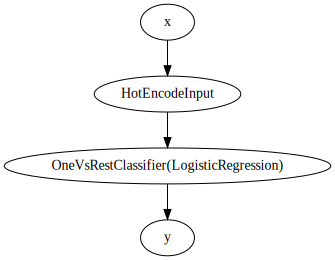

In [0]:
model.draw()

# Nouvelle section